<a href="https://colab.research.google.com/github/UrukHan/Poker/blob/master/Poker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import argparse
import imutils
import cv2
import inspect
import matplotlib.pyplot as plt
%matplotlib inline 

In [238]:
imagePoker = cv2.imread('/content/imagePoker.png')
B3 = cv2.imread("/content/B3.png")
HA = cv2.imread("/content/HA.png")
HK = cv2.imread("/content/HK.png")
P8 = cv2.imread("/content/P8.png")
P9 = cv2.imread("/content/P9.png")
T8 = cv2.imread("/content/T8.png")

(cardHeight, cardWidth) = B3.shape[:2]

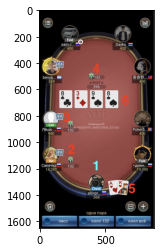

In [239]:
# Выводв RGB
screen = cv2.cvtColor(imagePoker, cv2.COLOR_RGB2BGR)
plt.imshow(screen)
plt.show()

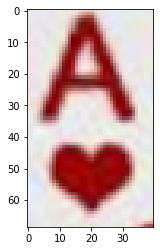

In [240]:
screen = cv2.cvtColor(HA, cv2.COLOR_RGB2BGR)
plt.imshow(screen)
plt.show()

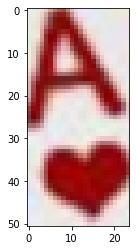

In [297]:
# Функция трансформации изображения
def transform(img, rot):
  # Поворот и масштабирование изображения
  (h, w) = img.shape[:2]
  center = (w / 2, h / 2)
  M = cv2.getRotationMatrix2D(center, rot, 0.8)
  rotated = cv2.warpAffine(img, M, (w, h))
  # Обрезка изображения
  cropped = rotated[9:60, 8:32]
  return cropped
screen = cv2.cvtColor(transform(HA, 8), cv2.COLOR_RGB2BGR)
plt.imshow(screen)
plt.show()

In [242]:
# Функцция для получения названия переменной
def getName(var):
  return [name for name, value in inspect.currentframe().f_back.f_locals.items() if value is var]

In [293]:
cards = [B3, HA, HK, P8, P9, T8]
resultCards = {'player': [], 'table': []}
for i in cards:
  x = 1 if getName(i)[0] == 'i' else 0   
  result = cv2.matchTemplate(imagePoker, i, cv2.TM_CCOEFF_NORMED)
  (max_val, max_val, minLoc, maxLoc) = cv2.minMaxLoc(result) 
  if max_val > 0.9: 
    if maxLoc[1] > 1200:
      resultCards['player'].append(getName(i)[x])
    else:
      resultCards['table'].append(getName(i)[x])
  print(max_val)
resultCards

0.9986324310302734
0.5652858018875122
0.5944905877113342
0.999833881855011
0.9998341798782349
0.9998298287391663


{'player': [], 'table': ['B3', 'P8', 'P9', 'T8']}

In [294]:
cards = [B3, HA, HK, P8, P9, T8]
for i in cards:
  t = transform(i, 8)
  x = 1 if getName(i)[0] == 'i' else 0 
  result = cv2.matchTemplate(imagePoker, t, cv2.TM_CCOEFF_NORMED)
  (max_val, max_val, minLoc, maxLoc) = cv2.minMaxLoc(result)
  if max_val > 0.9: 
    if maxLoc[1] > 1200:
      resultCards['player'].append(getName(i)[x])
    else:
      resultCards['table'].append(getName(i)[x])
  print(max_val)
resultCards

0.47001850605010986
0.9611811637878418
0.6167134046554565
0.4655856788158417
0.5053006410598755
0.45747068524360657


{'player': ['HA'], 'table': ['B3', 'P8', 'P9', 'T8']}

In [295]:
cards = [B3, HA, HK, P8, P9, T8]
for i in cards:
  t = transform(i, -8)
  x = 1 if getName(i)[0] == 'i' else 0 
  result = cv2.matchTemplate(imagePoker, t, cv2.TM_CCOEFF_NORMED)
  (max_val, max_val, minLoc, maxLoc) = cv2.minMaxLoc(result)
  if max_val > 0.9: 
    if maxLoc[1] > 1200:
      resultCards['player'].append(getName(i)[x])
    else:
      resultCards['table'].append(getName(i)[x])
  print(max_val)
resultCards

0.5320205092430115
0.627276599407196
0.9667728543281555
0.49193665385246277
0.46002185344696045
0.47319740056991577


{'player': ['HA', 'HK'], 'table': ['B3', 'P8', 'P9', 'T8']}

# **Обрезка текста с изображения**

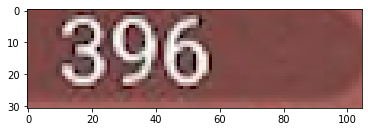

In [615]:
PlayerRate1 = imagePoker[1163:1198, 170:300]
PlayerRate2 = imagePoker[892:928, 170:300]
PlayerBalance0 = imagePoker[1402:1435, 365:510]
PlayerBalance1 = imagePoker[1193:1224, 15:160]
PlayerBalabce2 = imagePoker[922:953, 15:160]
Bank1 = imagePoker[492:525, 415:505]
Bank2 = imagePoker[568:599, 400:505]
numberData = [PlayerRate1, PlayerRate2, PlayerBalance0, PlayerBalance1, PlayerBalabce2, Bank1, Bank2]
screen = cv2.cvtColor(Bank2, cv2.COLOR_RGB2BGR)
plt.imshow(screen)
plt.show()

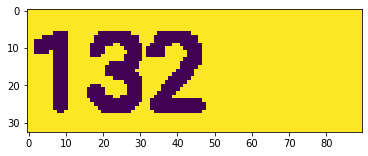

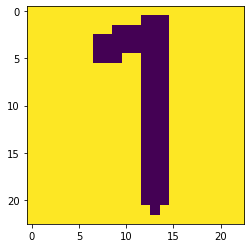

In [616]:

def lettersExtract(img):
  letters = []
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, threshold = cv2.threshold(gray, 127, 255, 0)
  threshold = cv2.bitwise_not(threshold)  
  contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  erode = cv2.erode(threshold, np.ones((2, 2), np.uint8), iterations=1)
  output = erode.copy()
  plt.imshow(output)
  plt.show()

  for idx, contour in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    if hierarchy[0][idx][3] == 0:
      cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
      letter_crop = gray[y:y + h, x:x + w]
      size_max = max(w, h)
      letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
      letter_square = cv2.bitwise_not(letter_square)
      if w > h:
        y_pos = size_max//2 - h//2
        letter_square[y_pos:y_pos + h, 0:w] = letter_crop
      elif w < h:
        x_pos = size_max//2 - w//2
        letter_square[0:h, x_pos:x_pos + w] = letter_crop
      else:
        letter_square = letter_crop
      ret, letter_square = cv2.threshold(letter_square, 127, 255, 0)
      letter_square = cv2.bitwise_not(letter_square)  
      letters.append((x, w, letter_square))
  letters.sort(key=lambda x: x[0], reverse=False)

  return letters

letters = lettersExtract(Bank1) 

plt.imshow(letters[0][2])
plt.show()

In [598]:
def outputImg(img):
  letters = []
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, threshold = cv2.threshold(gray, 127, 255, 0)
  threshold = cv2.bitwise_not(threshold)  
  contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  erode = cv2.erode(threshold, np.ones((2, 2), np.uint8), iterations=1)
  output = erode.copy()
  plt.imshow(output)
  plt.show()
  return output

In [487]:
# numberDictionary = {'0': letters[2][2], '4': letters[1][2], '9': letters[0][2]}

In [508]:
# numberDictionary[','] = letters[2][2]

In [512]:
# np.save('numbersDictionary.npy', numberDictionary)

In [513]:
numberDictionary = np.load('/content/numbersDictionary.npy',allow_pickle='TRUE').item()

In [541]:
numberDictionary.keys()

dict_keys(['0', '4', '9', '1', '2', '7', '8', '3', '6', ','])

In [623]:
numb = ['1', '2']
numbData = {}
numbData['f'] = numb
numbData

{'f': ['1', '2']}

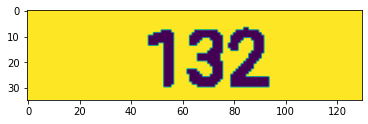

['1', '3', '2']


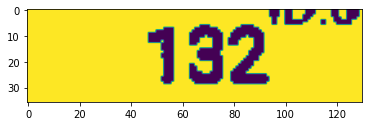

['1', '3', '2']


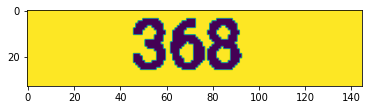

['3', '6', '8']


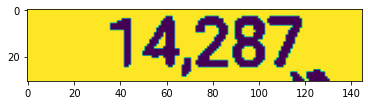

['1', '4', ',', '2', '8', '7']


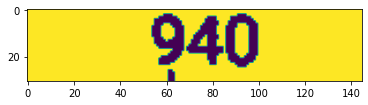

['9', '4', '0']


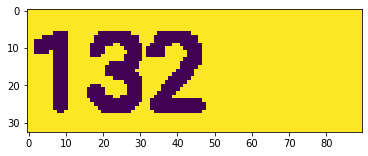

['1', '3', '2']


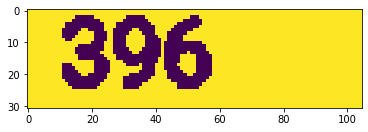

['3', '9', '6']
{'PlayerRate1': ['1', '3', '2'], 'PlayerRate2': ['1', '3', '2'], 'PlayerBalance0': ['3', '6', '8'], 'PlayerBalance1': ['1', '4', ',', '2', '8', '7'], 'PlayerBalabce2': ['9', '4', '0'], 'Bank1': ['1', '3', '2'], 'Bank2': ['3', '9', '6']}


In [629]:
numberList = ['0', '1', '2', '3', '4', '6', '7', '8', '9', ',']
numbData = {}
for i in numberData:
  letters = lettersExtract(i)
  numb = []
  x = ''
  for j in range(len(letters)):
    val = 0
    for d in numberList:
      result = cv2.matchTemplate(letters[j][2], numberDictionary[d], cv2.TM_CCOEFF_NORMED)
      (max_val, max_val, minLoc, maxLoc) = cv2.minMaxLoc(result)
      if max_val > val:
        val = max_val
        x = d
    if val > 0.5:
      numb.append(x)
  numbData[getName(i)[1]] = numb
  print(numb)
print(numbData)

In [632]:
resultCards.update(numbData)

In [633]:
resultCards

{'Bank1': ['1', '3', '2'],
 'Bank2': ['3', '9', '6'],
 'PlayerBalabce2': ['9', '4', '0'],
 'PlayerBalance0': ['3', '6', '8'],
 'PlayerBalance1': ['1', '4', ',', '2', '8', '7'],
 'PlayerRate1': ['1', '3', '2'],
 'PlayerRate2': ['1', '3', '2'],
 'player': ['HA', 'HK'],
 'table': ['B3', 'P8', 'P9', 'T8']}

In [634]:
with open("answer.json", "w") as outfile:  
    json.dump(resultCards, outfile)